# Fig. 5 panel E trajectory plot

In [5]:
import os, sys
from pathlib import Path
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['pdf.fonttype'] = 42

script_path = Path.cwd().parent.parent.parent / "script"
data_path = Path.cwd().parent.parent.parent / "data"
sys.path.append(str(script_path))

output_folder = Path.cwd() / "output"
os.makedirs(output_folder, exist_ok=True)

## Load data

In [6]:
%store -r fig5_timestamp
print(f"Timestamp: {fig5_timestamp}")

# load the number of seeds used in the alignedUMAP
try:
    %store -r n_seeds
    print(f"n_seeds: {n_seeds}")
except:
    print("n_seeds not found. please specify (below) the number of bootstrap seeds (same as that used in Fig5_A_aligned_umap.ipynb)")
    n_seeds = 200

Timestamp: 2023-10-21-for-figures
n_seeds: 50


In [7]:
# load adata
csv_path = Path.cwd().parent / "panel_C" / "output" / f"{fig5_timestamp}_umap_table.csv"

try:
    # load the file
    umap_table = pd.read_csv(csv_path)
except FileNotFoundError:
    print(f"File {csv_path} not found.\nPlease run leiden analysis first (fig5 panel C) or specify the correct timestamp, current value is {fig5_timestamp}")
except pd.errors.ParserError:
    print(f"There was an error parsing the CSV file at {csv_path}.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [8]:
umap_table

,Unnamed: 0,Protein IDs,Majority protein IDs,Gene names,14-COPE,14-RAB7A,17-G3BP1,17-MAP1LC3B,14-RAB1A,17-SLC30A2,...,uninf_leiden_res_1_seed_8842,inf_leiden_res_1_seed_8842,uninf_leiden_res_1_seed_8842_annot,inf_leiden_res_1_seed_8842_annot,uninf_leiden_res_1_seed_8842_annot_raw,inf_leiden_res_1_seed_8842_annot_raw,cluster_annot_uninf,cluster_annot_inf,cluster_annot_uninf_raw,cluster_annot_inf_raw
0,0,A0A023T6R1;Q96A72;F5H6P7;F5H6N1;F5H3U9;F5H124,A0A023T6R1;Q96A72;F5H6P7;F5H6N1,FLJ10292;MAGOHB,1.645245,0.553501,-1.866320,2.776901,2.149945,-0.291168,...,6,2,6:Nucleus,2:Nucleus,6:Nucleus,2:Nucleus,nucleus,nucleus,nucleus,nucleus
1,1,Q9Y5S9;A0A023T787;A0A0J9YW13,Q9Y5S9;A0A023T787,RBM8A;RBM8,-0.647550,-1.191250,0.825300,0.131400,-0.854450,-1.464800,...,3,1,3:Nucleolus,1:Nuclear Lumen,3:Nucleolus,1:Nuclear Lumen,nucleus,nucleus,nucleus,nucleus
2,2,A0A0C4DFM1;A0A024QYR3;Q92544;B4DH88;B4DKC1;Q6Z...,A0A0C4DFM1;A0A024QYR3;Q92544;B4DH88;B4DKC1;Q6ZTK5,TM9SF4,3.882100,2.824950,-1.202100,4.301950,5.086500,-2.466100,...,11,6,11:Golgi Membrane,6:Lysosome,11:Golgi Membrane,6:Lysosome,ERGIC/Golgi,endo-lysosome & trans-Golgi,ERGIC/Golgi,endo-lysosome & trans-Golgi
3,3,A0A024QYR6;A0A1V0DNR7;A0A6G6A825;F6KD02;F6KD01...,A0A024QYR6;A0A1V0DNR7;A0A6G6A825;F6KD02;F6KD01...,PTEN,-0.762769,-0.474805,-0.629573,0.025641,0.154074,0.282261,...,0,0,0:cullin-RING Ubiquitin Ligase Complex,0:cullin-RING Ubiquitin Ligase Complex,0:cullin-RING Ubiquitin Ligase Complex,0:cullin-RING Ubiquitin Ligase Complex,cytosol,cytosol,cytosol,cytosol
4,4,Q99805;A0A024QYR8;B3KSG9,Q99805;A0A024QYR8;B3KSG9,TM9SF2,1.616050,2.383950,-1.847700,3.002300,3.154950,-1.629500,...,11,6,11:Golgi Membrane,6:Lysosome,11:Golgi Membrane,6:Lysosome,ERGIC/Golgi,endo-lysosome & trans-Golgi,ERGIC/Golgi,endo-lysosome & trans-Golgi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8009,8009,X5D2T3;X1WI28;P27635;B8A6G2;X5D2W5;A6QRI9;Q96L21,X5D2T3;X1WI28;P27635,RPL10,-0.460500,-0.844800,2.176600,-0.640050,-0.807800,0.248500,...,10,10,10:Ribosome,10:Ribosome,10:Ribosome,10:Ribosome,translation/RNA granules,translation/RNA granules,translation/RNA granules,translation/RNA granules
8010,8010,X5D7P8,X5D7P8,STK39,-0.424653,0.527950,-0.763870,-0.681943,-0.719628,-0.000433,...,0,0,0:cullin-RING Ubiquitin Ligase Complex,0:cullin-RING Ubiquitin Ligase Complex,0:cullin-RING Ubiquitin Ligase Complex,0:cullin-RING Ubiquitin Ligase Complex,cytosol,cytosol,cytosol,cytosol
8011,8011,X5DQV1;X5DNI1;B3KV96;E9PD68;B3KXQ5;Q14194;B3KT...,X5DQV1;X5DNI1;B3KV96;E9PD68;B3KXQ5;Q14194;B3KT...,CRMP1,0.186620,-0.108855,-0.998487,-0.783689,0.074646,0.877953,...,0,0,0:cullin-RING Ubiquitin Ligase Complex,0:cullin-RING Ubiquitin Ligase Complex,0:cullin-RING Ubiquitin Ligase Complex,0:cullin-RING Ubiquitin Ligase Complex,cytosol,cytosol,cytosol,cytosol
8012,8012,X5DQZ7,X5DQZ7,GPX1,3.146199,2.232133,0.177826,-0.781977,0.066985,-1.115775,...,4,3,4:Cytoplasmic Vesicle Lumen,3:Mitochondrial Membrane,4:Cytoplasmic Vesicle Lumen,3:Mitochondrial Membrane,cytosol,mitochondrion,cytosol,mitochondrion


### Trajectory plot

In [9]:
embedding1 = np.vstack([umap_table['JointUMAP_uninf_1'], umap_table['JointUMAP_uninf_2']]).T
embedding2 = np.vstack([umap_table['JointUMAP_inf_1'], umap_table['JointUMAP_inf_2']]).T

# keep only the hits
try:
    hits_idx = (umap_table[f"10d_mean_distance_traveled ({n_seeds} bootstraps)"] > 2)
except:
    print(f'''Column "10d_mean_distance_traveled ({n_seeds} bootstraps)" not found. 
    Please first execute notebook Fig5_C_umap_with_leiden_labels.ipynb,
    and then make sure the the variable "n_seeds" is consistent between the two notebooks.
            ''')

embedding1_hits = embedding1[hits_idx]
embedding2_hits = embedding2[hits_idx]

print(f"number of hits = {len(embedding1_hits)}")


number of hits = 445


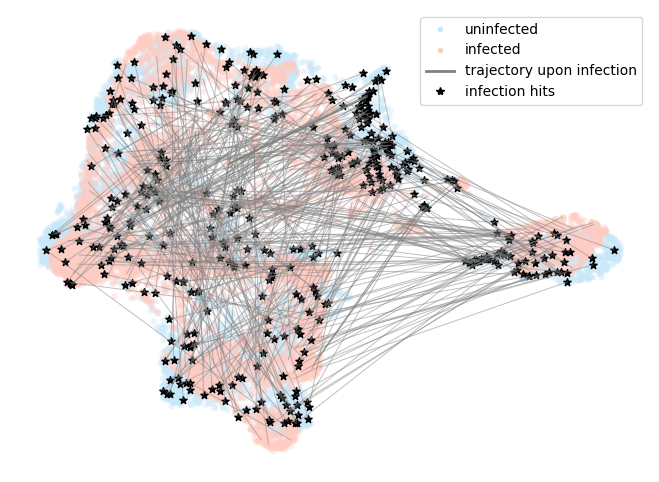

In [10]:
# plot trajectory lines
plt.rcParams['pdf.fonttype'] = 42

fig, ax = plt.subplots(figsize=(8.25, 6))

# plot the two embeddings as scatter plots
ax.scatter(embedding1[:, 0], embedding1[:, 1], color='#C7E8F9', s=80, alpha=0.4, label='Uninfected', marker='.', linewidths=0,edgecolor=None)
ax.scatter(embedding2[:, 0], embedding2[:, 1], color='#FFCCC2', s=80, alpha=0.4, label='Infected', marker='.', linewidths=0,edgecolor=None)

# plot trajectory lines
for start, end in zip(embedding1_hits, embedding2_hits):
    # draw line
    ax.plot([start[0], end[0]], [start[1], end[1]], color='grey', linewidth=0.7, alpha=0.5)
    # draw marker at the end point
for start, end in zip(embedding1_hits, embedding2_hits):
    ax.scatter(start[0], start[1], color='black', s=30, marker='*', edgecolor=None)

# add legend
blue_dot =  mlines.Line2D([], [], color='#C7E8F9', marker='.', linestyle='None', label='uninfected')
red_dot = mlines.Line2D([], [], color='#FFCCC2', marker='.', linestyle='None', label='infected')
solid_line = mlines.Line2D([], [], color='grey', linestyle='-', linewidth=2, label='trajectory upon infection')
black_star = mlines.Line2D([], [], color='black', marker='*', linestyle='None', label='infection hits')
ax.legend(handles=[blue_dot, red_dot, solid_line, black_star])

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())

for spine in ax.spines.values():
    spine.set_visible(False)

plt.savefig(output_folder / "trajectory_and_startpoints_hits.pdf", format='pdf', bbox_inches='tight')
plt.show()